In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/rohit-sharma-all-international-cricket-centuries/Rohit-Sharma-All-International-Cricket-Centuries.csv


# Reading data

In [2]:
df = pd.read_csv("/kaggle/input/rohit-sharma-all-international-cricket-centuries/Rohit-Sharma-All-International-Cricket-Centuries.csv")

# Columns of dataset

In [3]:
df.head()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result
0,1,114,Zimbabwe,4,1,"Queens Sports Club, Bulawayo",Away,28-May-10,Lost
1,2,101*,Sri Lanka,4,2,"Queens Sports Club, Bulawayo",Neutral,30-May-10,Won
2,3,141*,Australia,1,2,"Sawai Mansingh Stadium, Jaipur",Home,16-Oct-13,Won
3,4,209,Australia,1,1,"M. Chinnaswamy Stadium, Bangalore",Home,02-Nov-13,Won
4,5,177,West Indies,6,2,"Eden Gardens, Kolkata",Home,06-Nov-13,Won


In [4]:
df.shape

(43, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No.       43 non-null     int64 
 1   Score     43 non-null     object
 2   Against   43 non-null     object
 3   Position  43 non-null     int64 
 4   Innings   43 non-null     int64 
 5   Venue     43 non-null     object
 6   Ground    43 non-null     object
 7   Date      43 non-null     object
 8   Result    43 non-null     object
dtypes: int64(3), object(6)
memory usage: 3.1+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Score']=df['Score'].astype(str)
df['Score'] = df['Score'].str.replace(r'[^\w\s]', '')
df['Score']=df['Score'].astype(str).astype(int)
df['Year'] = df['Date'].dt.year

In [7]:
df.describe()

,No.,Score,Position,Innings,Year
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,22.000000,136.930233,1.697674,1.534884,2017.162791
std,12.556539,35.956585,1.389328,0.591561,2.877915
min,1.000000,100.000000,1.000000,1.000000,2010.000000
25%,11.500000,111.000000,1.000000,1.000000,2015.500000
50%,22.000000,125.000000,1.000000,1.000000,2018.000000
75%,32.500000,151.000000,2.000000,2.000000,2019.000000
max,43.000000,264.000000,6.000000,3.000000,2023.000000


# Null Values

In [8]:
df.isnull().sum()

No.         0
Score       0
Against     0
Position    0
Innings     0
Venue       0
Ground      0
Date        0
Result      0
Year        0
dtype: int64

# Correlation 

In [9]:
corel=df.corr()

<Axes: >

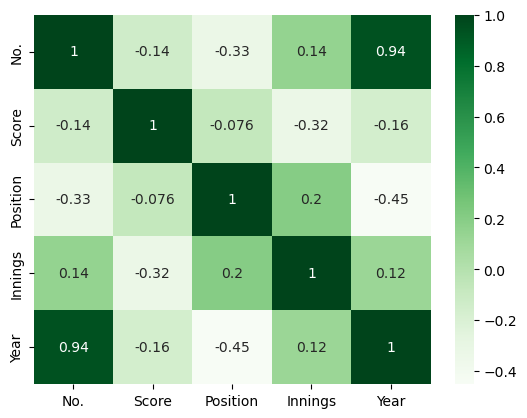

In [10]:
sns.heatmap(corel, annot=True, cmap="Greens")

# ****Exploratory Data Analysis

# Graphical Representation of columns

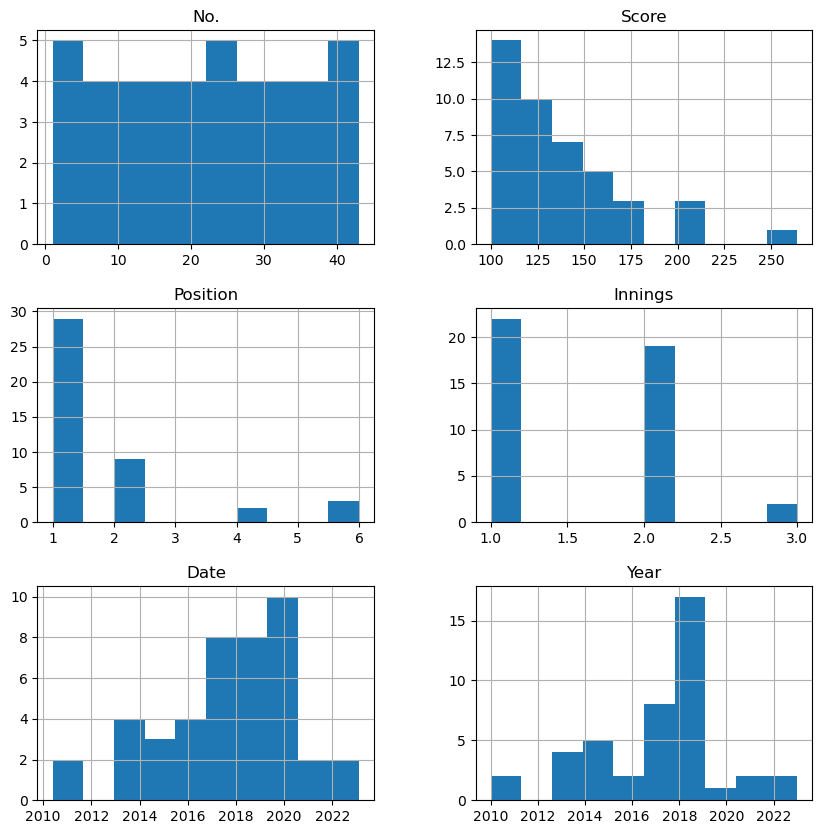

In [11]:
df.hist(figsize=(10,10))
plt.show()


# Relationship

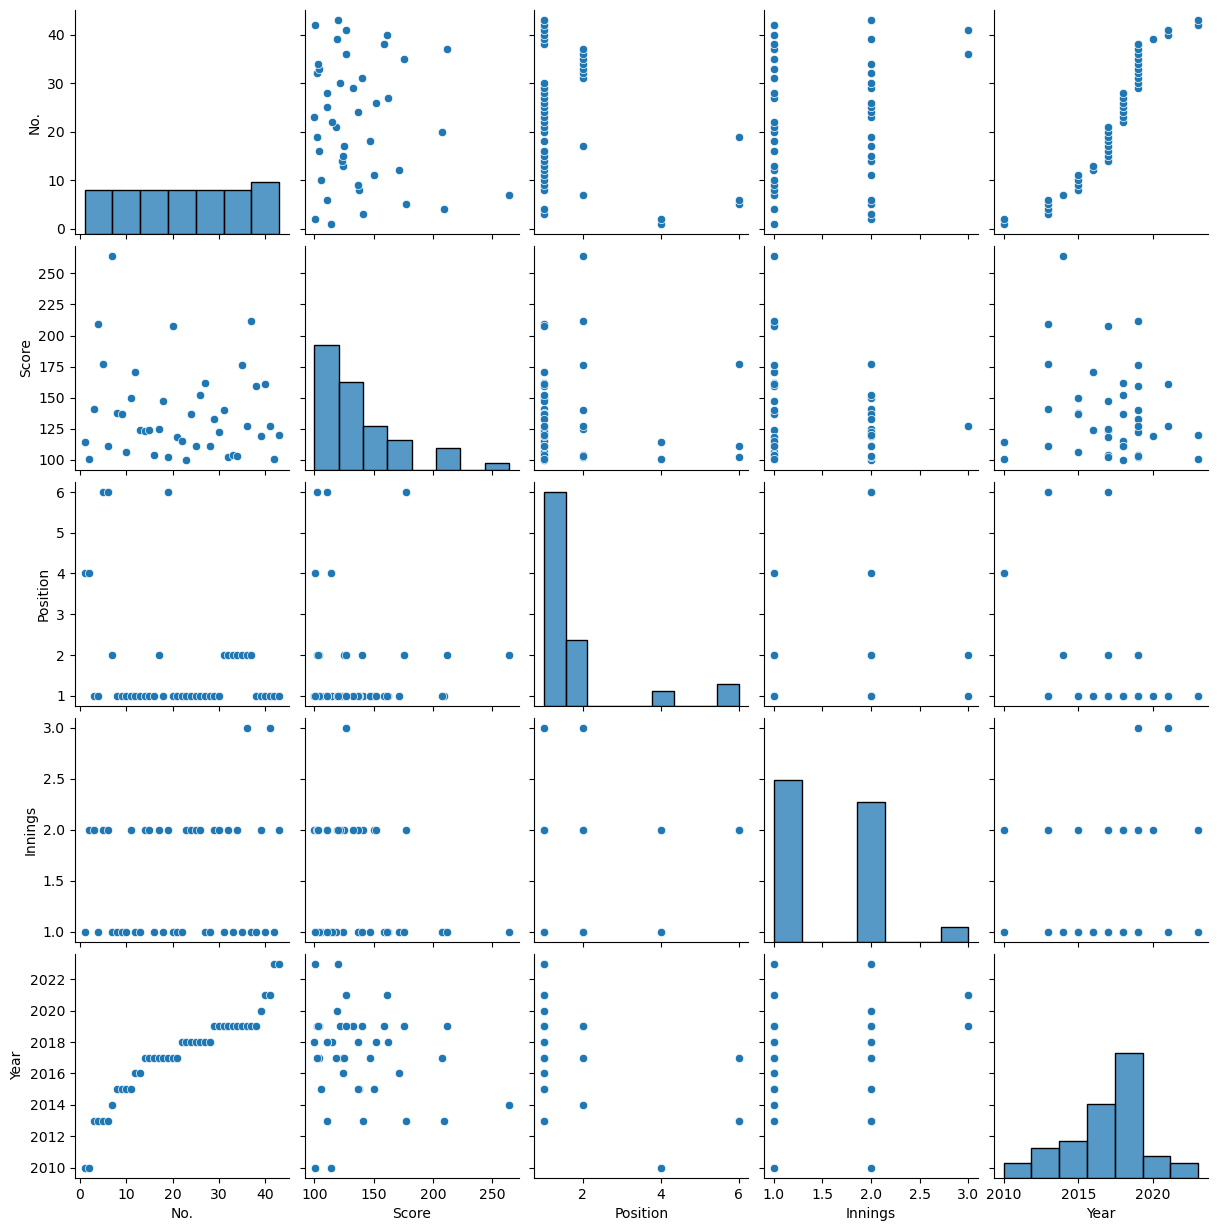

In [12]:
sns.pairplot(df)
plt.show()

# Score against teams

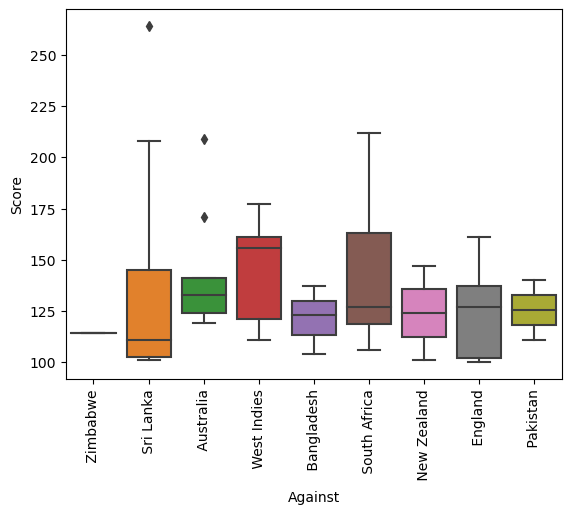

In [13]:
sns.boxplot(x='Against', y='Score', data=df)
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

# Score in Innings

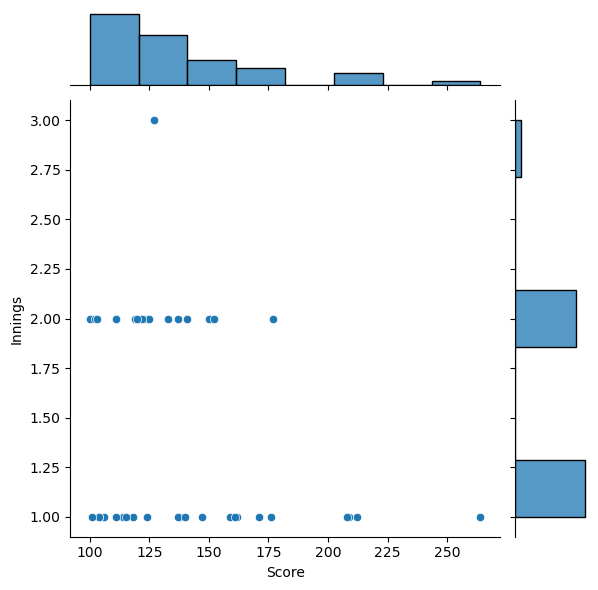

In [14]:
sns.jointplot(data=df, x='Score', y='Innings')
plt.show()

# Scores

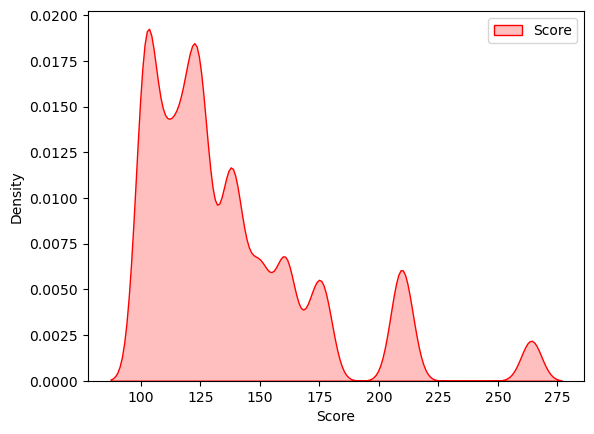

In [15]:

sns.kdeplot(data=df, x='Score', bw_adjust=0.25, fill=True, color='red', label='Score')
plt.legend()
plt.show()


# Number of venues played

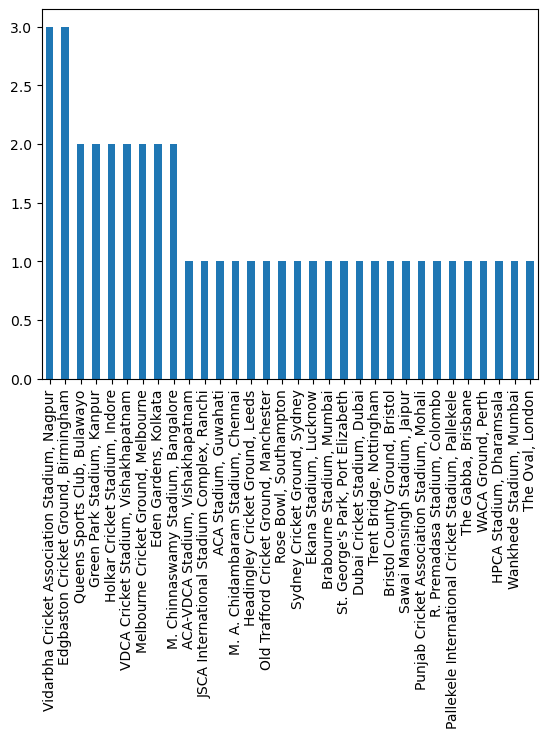

In [16]:
df['Venue'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()


# In years played

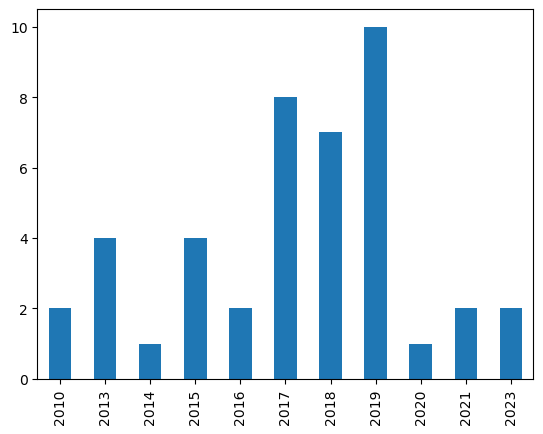

In [17]:
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.show()


# Innings against Teams

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Zimbabwe'),
  Text(1, 0, ' Sri Lanka'),
  Text(2, 0, ' Australia'),
  Text(3, 0, ' West Indies'),
  Text(4, 0, ' Bangladesh'),
  Text(5, 0, ' South Africa'),
  Text(6, 0, ' New Zealand'),
  Text(7, 0, ' England'),
  Text(8, 0, ' Pakistan')])

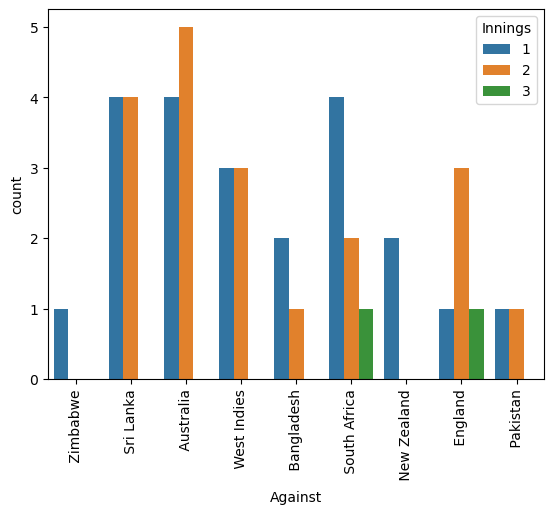

In [18]:
sns.countplot(data=df,x="Against",hue="Innings")
plt.xticks(rotation=90)

# Score in grounds

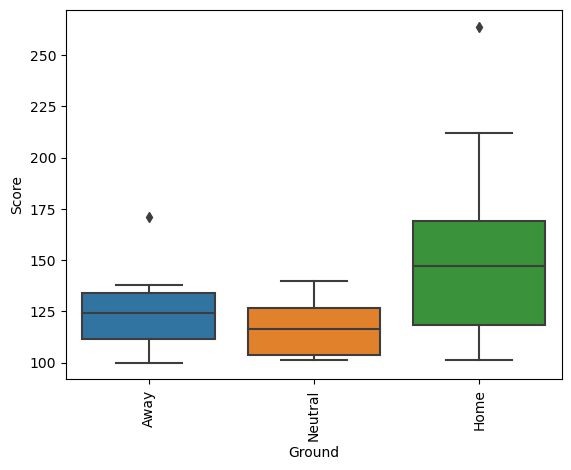

In [19]:
sns.boxplot(x='Ground', y='Score', data=df)
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

# Result with grounds

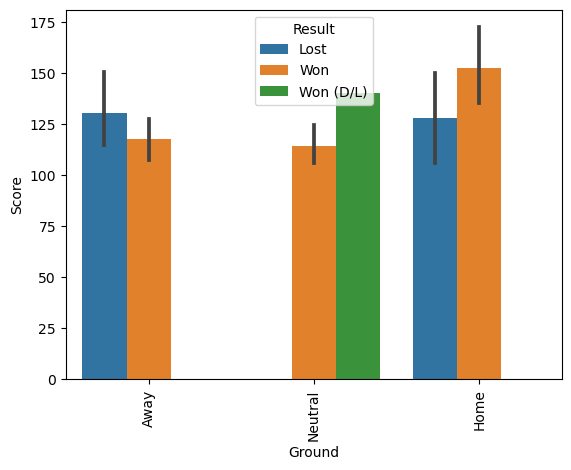

In [20]:
sns.barplot(x='Ground', y='Score', hue='Result', data=df)
plt.xticks(rotation=90)
plt.show()

# Score in years

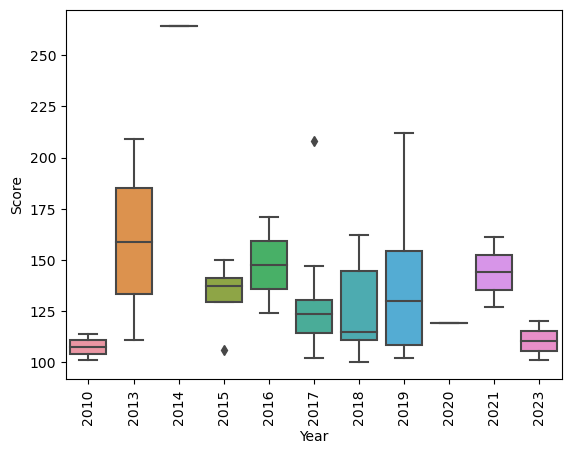

In [21]:
sns.boxplot(x='Year', y='Score', data=df)
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

# Score at position

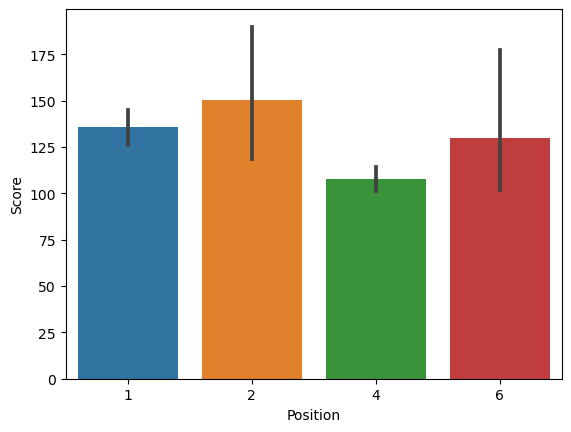

In [22]:
sns.barplot(x='Position', y='Score', data=df)
plt.show()

Position with year

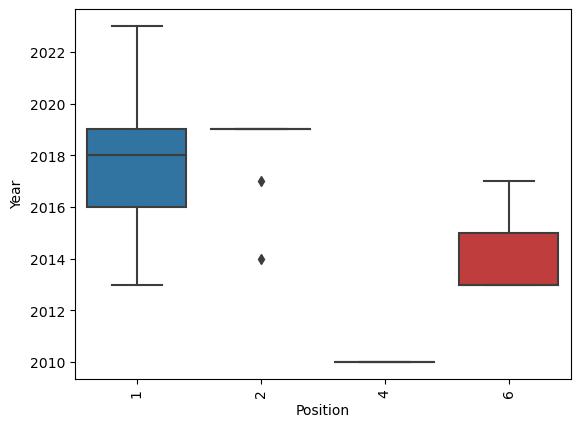

In [23]:
sns.boxplot(y='Year', x='Position', data=df)
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()

# Result when scored

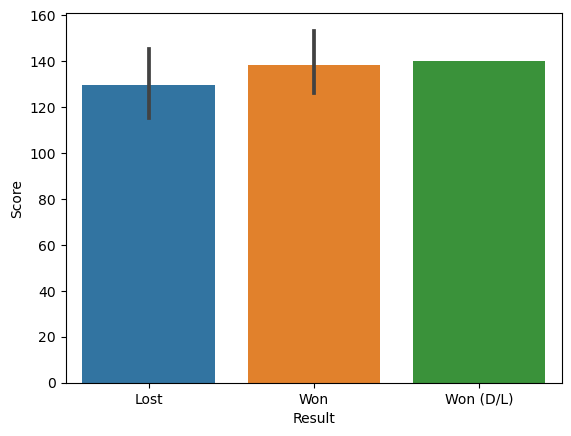

In [24]:
sns.barplot(x='Result', y='Score', data=df)
plt.show()